In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
import cv2

print("Done!")

Done!


In [ ]:
# transform = transforms.ToTensor()
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64,64))
])
# mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_data = datasets.ImageFolder(root = r'/content/drive/MyDrive/Self supervised/Data', transform=transform)
data_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=8, shuffle=True)
i = 0
for (img,_) in data_loader:
    print(img.size())
print("Done")

torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])
t

In [ ]:
dataiter = iter(data_loader)
images, labels = dataiter.next()
print(torch.min(images), torch.max(images))
print("done")

tensor(0.) tensor(1.)
done


In [ ]:
# class Autoencoder(nn.Module):
#     def __init__(self):
#         # N, 1, 28, 28
#         super().__init__()
#         self.encoder = nn.Sequential(
#             nn.Conv2d(3, 16, 3, stride=2, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(16, 32, 3, stride=2, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(32, 64, 3, stride=2, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(64, 128, 3, stride=2, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(128, 256, 3, stride=2, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(256, 512, 7)
#         )

#         self.decoder = nn.Sequential(
#             nn.ConvTranspose2d(512, 256, 7),
#             nn.ReLU(),
#             nn.ConvTranspose2d(256, 128, 3, stride= 2, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         encoded = self.encoder(x)
#         # print(len(encoded[0]))
#         # print(encoded.size())
#         decoded = self.decoder(encoded)
#         # print(len(decoded[0]))
#         # print(decoded.size())
#         return decoded

# # Note : [-1, 1] use Tanh
# ## nn.MaxPool2d -> nn.MaxUnpool2d

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        # N, 1, 28, 28
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128,7)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        # print(len(encoded[0]))
        # print(encoded.size())
        decoded = self.decoder(encoded)
        # print(len(decoded[0]))
        # print(decoded.size())
        return decoded


In [ ]:
def save_checkpoint(state, filename = '/content/drive/MyDrive/Self supervised/my_checkpoint.pth.tar'):
    print("=> Saving checkpoint")
    torch.save(state, filename)

In [ ]:
def load_checkpoint(checkpoint):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])

In [ ]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

torch.save(model.state_dict(), "/content/drive/MyDrive/Self supervised/model.pth")

encoder.0.weight 	 torch.Size([16, 3, 3, 3])
encoder.0.bias 	 torch.Size([16])
encoder.2.weight 	 torch.Size([32, 16, 3, 3])
encoder.2.bias 	 torch.Size([32])
encoder.4.weight 	 torch.Size([64, 32, 3, 3])
encoder.4.bias 	 torch.Size([64])
encoder.6.weight 	 torch.Size([128, 64, 7, 7])
encoder.6.bias 	 torch.Size([128])
decoder.0.weight 	 torch.Size([128, 64, 7, 7])
decoder.0.bias 	 torch.Size([64])
decoder.2.weight 	 torch.Size([64, 32, 3, 3])
decoder.2.bias 	 torch.Size([32])
decoder.4.weight 	 torch.Size([32, 16, 3, 3])
decoder.4.bias 	 torch.Size([16])
decoder.6.weight 	 torch.Size([16, 3, 3, 3])
decoder.6.bias 	 torch.Size([3])


In [ ]:
num_epochs = 6
outputs = []

In [ ]:
load_model = True

In [ ]:
if (load_model and os.path.isfile("/content/drive/MyDrive/Self supervised/my_checkpoint.pth.tar")):
    load_checkpoint(torch.load("/content/drive/MyDrive/Self supervised/my_checkpoint.pth.tar"))

for epoch in range(num_epochs):

    if((epoch+1)%5 == 0):
        checkpoint = {'state_dict' : model.state_dict(), 'optimizer' : optimizer.state_dict()}
        save_checkpoint(checkpoint)

    for (img,_) in data_loader:
        # img = img.reshape(-1, 200*200)
        # print(type(img), img.shape)
        model.train()
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch : {epoch + 1}, Loss : {loss.item():0.4f}')
    outputs.append((epoch, img, recon))

=> Loading checkpoint
Epoch : 1, Loss : 0.0053
Epoch : 2, Loss : 0.0025
Epoch : 3, Loss : 0.0042
Epoch : 4, Loss : 0.0029
=> Saving checkpoint
Epoch : 5, Loss : 0.0020
Epoch : 6, Loss : 0.0049


In [ ]:
print(type(img))

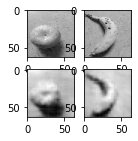

In [ ]:
for k in range(0, num_epochs, 1):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        # item = item.reshape(-1, 200, 200)
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)
        # item = item.reshape(-1, 200, 200)
        plt.imshow(item[0])

In [ ]:
load_model = True

if (load_model and os.path.isfile("/content/drive/MyDrive/Self supervised/my_checkpoint.pth.tar")):
    load_checkpoint(torch.load("/content/drive/MyDrive/Self supervised/my_checkpoint.pth.tar"))

=> Loading checkpoint


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5), (0.5))
    transforms.Resize((64,64))
])
# mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.ImageFolder(root = r'/content/drive/MyDrive/Self supervised/Data2', transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=8, shuffle=True)

ops = []

for (img, _) in data_loader:
    recon = model(img)
    ops.append((img, recon))

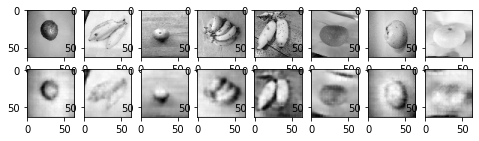

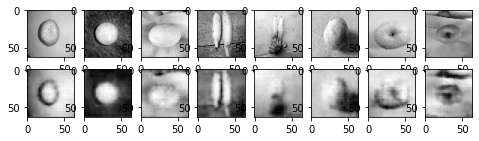

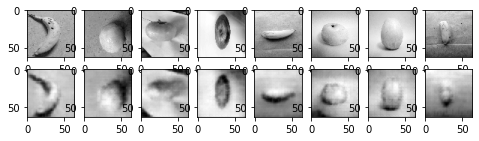

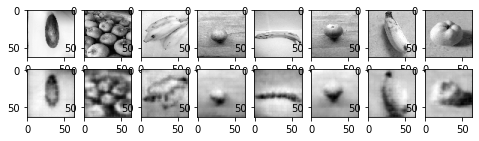

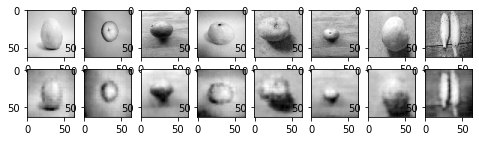

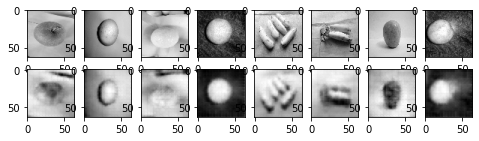

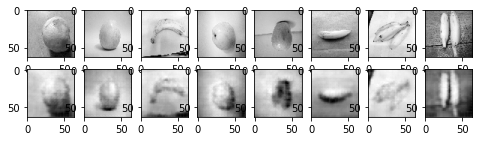

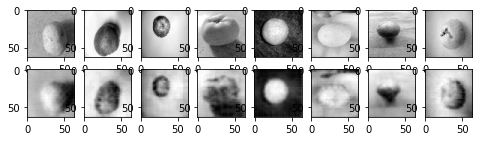

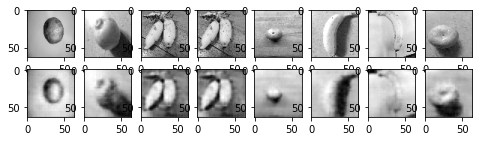

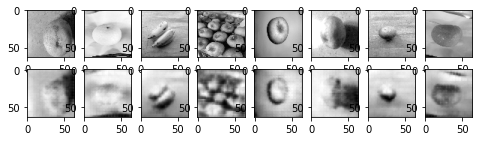

In [ ]:
for k in range(0, 10, 1):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = ops[k][0].detach().numpy()
    recon = ops[k][1].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        # item = item.reshape(-1, 200, 200)
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)
        # item = item.reshape(-1, 200, 200)
        plt.imshow(item[0])

In [ ]:
class Autoencoder_Linear(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(200*200, 728),
            nn.ReLU(),
            nn.Linear(728, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 5)
        )

        self.decoder = nn.Sequential(
            nn.Linear(5, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 728),
            nn.ReLU(),
            nn.Linear(728, 200*200),
            nn.Sigmoid()
        )


    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        # print(encoded)
        return decoded

# Note : [-1, 1] use Tanh